In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import torch
import time
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [3]:
data = np.asarray(iris.data)

In [4]:
# weights = torch.rand((15, 15, data.shape[1]))
data = torch.FloatTensor(data)

In [5]:
def update_weights(lr, weights_i, row_index, col_index, multiplier, original_vector):
  return lr*multiplier*(original_vector - weights_i)

In [6]:
lr = 0.01
epochs = 1000
weights = torch.rand((15, 15, data.shape[1]))
for epoch in range(epochs):
  for i in range(len(data)):
    # distances = ((data[i] - weights)**2).sum(axis=2)
    distances = (data[i].apply_(abs) + weights.apply_(abs)).sum(axis=2)
    optima_row = 0
    optima_col = 0
    min_over_rows, min_over_cols = torch.argmin(distances, dim=1), torch.argmin(distances, dim=0)
    for j in range(len(min_over_rows)):
      if distances[j, min_over_rows[j].data.item()] < distances[optima_row, optima_col]:
        optima_row, optima_col = j, min_over_rows[j].data.item()
    
    for j in range(len(min_over_cols)):
      if distances[min_over_cols[j].data.item(), j] < distances[optima_row, optima_col]:
        optima_row, optima_col = min_over_cols[j].data.item(), j

    multipl = 1
    weights[optima_row, optima_col] += update_weights(lr, weights[optima_row, optima_col], optima_row, optima_col, multipl, data[i])
    multipl *= 0.5
    if optima_row - 1 >= 0:
      weights[optima_row - 1, optima_col] += update_weights(lr, weights[optima_row, optima_col], optima_row , optima_col, multipl, data[i])
    if optima_row + 1 < weights.shape[0]:
      weights[optima_row + 1, optima_col] += update_weights(lr, weights[optima_row, optima_col], optima_row, optima_col, multipl, data[i])
    if optima_col - 1 >= 0:
      weights[optima_row, optima_col - 1] += update_weights(lr, weights[optima_row, optima_col], optima_row, optima_col, multipl, data[i])
    if optima_col + 1 < weights.shape[1]:
      weights[optima_row, optima_col + 1] += update_weights(lr, weights[optima_row, optima_col], optima_row, optima_col, multipl, data[i])
  print('Epoch number', epoch)

Epoch number 0
Epoch number 1
Epoch number 2
Epoch number 3
Epoch number 4
Epoch number 5
Epoch number 6
Epoch number 7
Epoch number 8
Epoch number 9
Epoch number 10
Epoch number 11
Epoch number 12
Epoch number 13
Epoch number 14
Epoch number 15
Epoch number 16
Epoch number 17
Epoch number 18
Epoch number 19
Epoch number 20
Epoch number 21
Epoch number 22
Epoch number 23
Epoch number 24
Epoch number 25
Epoch number 26
Epoch number 27
Epoch number 28
Epoch number 29
Epoch number 30
Epoch number 31
Epoch number 32
Epoch number 33
Epoch number 34
Epoch number 35
Epoch number 36
Epoch number 37
Epoch number 38
Epoch number 39
Epoch number 40
Epoch number 41
Epoch number 42
Epoch number 43
Epoch number 44
Epoch number 45
Epoch number 46
Epoch number 47
Epoch number 48
Epoch number 49
Epoch number 50
Epoch number 51
Epoch number 52
Epoch number 53
Epoch number 54
Epoch number 55
Epoch number 56
Epoch number 57
Epoch number 58
Epoch number 59
Epoch number 60
Epoch number 61
Epoch number 62
Ep

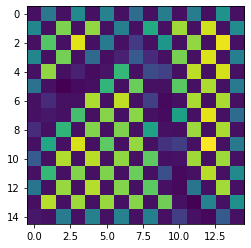

In [8]:
# time.strftime('%X')

plt.imshow(weights[:, :, 0], interpolation='nearest')

In [9]:
# 

In [10]:
# plt.imshow(weights, interpolation='nearest')

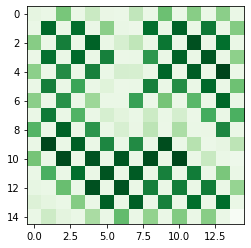

In [108]:
# plt.imshow(weights[:, :, 0], cmap='Greens')

In [57]:
# map = torch.zeros((15, 15))
# for i in range(len(data)):
#   # distances = ((data[i] - weights)**2).sum(axis=2)
#   distances = (data[i].apply_(abs) + weights.apply_(abs)).sum(axis=2)
#   optima_row = 0
#   optima_col = 0
#   min_over_rows, min_over_cols = torch.argmin(distances, dim=1), torch.argmin(distances, dim=0)
#   for j in range(len(min_over_rows)):
#     if distances[j, min_over_rows[j].data.item()] < distances[optima_row, optima_col]:
#       optima_row, optima_col = j, min_over_rows[j].data.item()
  
#   for j in range(len(min_over_cols)):
#     if distances[min_over_cols[j].data.item(), j] < distances[optima_row, optima_col]:
#       optima_row, optima_col = min_over_cols[j].data.item(), j
#   map[optima_row, optima_col] += distances[min_over_cols[j].data.item(), j].data.item()

In [1]:
# plt.imshow(map, cmap='Greys')

In [68]:
# weights[optima_row, optima_col][:2]

tensor([6.0861, 2.9973])

In [73]:
# get_nearest_point(iris_map[1], iris_map, 1)

34

In [32]:
weights[optima_row, optima_col]

tensor([6.3529, 2.9045, 5.0806, 1.7727])